In [1]:
#Import the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Load the data
from google.colab import files
uploaded = files.upload()


Saving AAPL.csv to AAPL.csv


In [3]:
#Store the data
AAPL = pd.read_csv('AAPL.csv')
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-05,203.350006,205.080002,202.899994,204.229996,201.821350,17265500
1,2019-07-08,200.809998,201.399994,198.410004,200.020004,197.661011,25338600
2,2019-07-09,199.199997,201.509995,198.809998,201.240005,198.866638,20578000
3,2019-07-10,201.850006,203.729996,201.559998,203.229996,200.833160,17897100
4,2019-07-11,203.309998,204.389999,201.710007,201.750000,199.370621,20191800
...,...,...,...,...,...,...,...
247,2020-06-26,364.410004,365.320007,353.019989,353.630005,353.630005,51314200
248,2020-06-29,353.250000,362.170013,351.279999,361.779999,361.779999,32661500
249,2020-06-30,360.079987,365.980011,360.000000,364.799988,364.799988,35055800
250,2020-07-01,365.119995,367.359985,363.910004,364.109985,364.109985,27684300


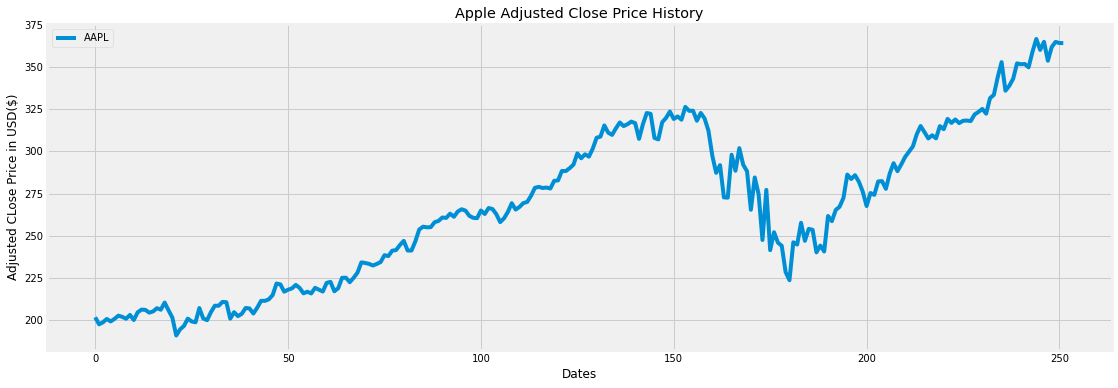

In [6]:
#Visualize the Stock Price
plt.figure(figsize = (17, 6))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.title("Apple Adjusted Close Price History")
plt.xlabel('Dates')
plt.ylabel("Adjusted CLose Price in USD($)")
plt.legend(loc='upper left')
plt.show()

In [7]:
#Create a simple moving object with a 30 day window
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = AAPL['Adj Close'].rolling(window = 30).mean()
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
247,334.765666
248,336.567999
249,338.229332
250,339.928331


In [8]:
#Create a simple moving 100 day average
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = AAPL['Adj Close'].rolling(window = 100).mean()
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
247,298.105444
248,298.525012
249,298.937371
250,299.386811


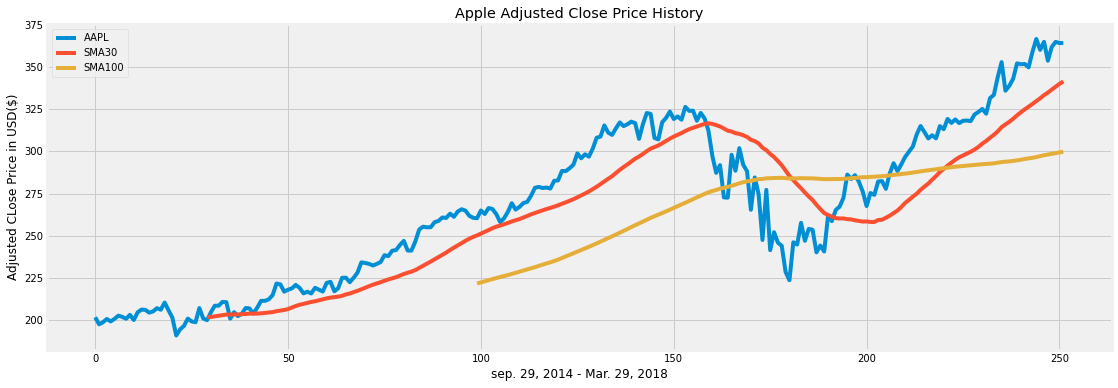

In [9]:
#Visualize the Stock Price
plt.figure(figsize = (17, 6))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label = 'SMA100')
plt.title("Apple Adjusted Close Price History")
plt.xlabel('sep. 29, 2014 - Mar. 29, 2018')
plt.ylabel("Adjusted CLose Price in USD($)")
plt.legend(loc='upper left')
plt.show()

In [11]:
#Create a new data frame to store all the data
data = pd.DataFrame()
data['AAPL'] = AAPL['Adj Close']
data['SMA30'] = SMA30['Adj Close']
data['SMA100'] = SMA100['Adj Close']
data

,AAPL,SMA30,SMA100
0,201.821350,NaN,NaN
1,197.661011,NaN,NaN
2,198.866638,NaN,NaN
3,200.833160,NaN,NaN
4,199.370621,NaN,NaN
...,...,...,...
247,353.630005,334.765666,298.105444
248,361.779999,336.567999,298.525012
249,364.799988,338.229332,298.937371
250,364.109985,339.928331,299.386811


In [12]:
#Create a signal to when to buy and sell an assert
def buy_sell(data):
  Buy = []
  Sell = []
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        Buy.append(data['AAPL'][i])
        Sell.append(np.nan)
        flag = 1
      else:
        Buy.append(np.nan)
        Sell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      
      if flag != 0:
        Buy.append(np.nan)
        Sell.append(data['AAPL'][i])
        flag = 0
       
      else:
        Buy.append(np.nan)
        Sell.append(np.nan)

    else:
      Buy.append(np.nan)
      Sell.append(np.nan)
  return (Buy, Sell)

In [13]:
#Create buy and sell column
a = buy_sell(data)
data['Buy_Signal_Price'] = a[0]
data['Sell_Signal_Price'] = a[1]

In [14]:
#Show the data
data

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,201.821350,NaN,NaN,NaN,NaN
1,197.661011,NaN,NaN,NaN,NaN
2,198.866638,NaN,NaN,NaN,NaN
3,200.833160,NaN,NaN,NaN,NaN
4,199.370621,NaN,NaN,NaN,NaN
...,...,...,...,...,...
247,353.630005,334.765666,298.105444,NaN,NaN
248,361.779999,336.567999,298.525012,NaN,NaN
249,364.799988,338.229332,298.937371,NaN,NaN
250,364.109985,339.928331,299.386811,NaN,NaN


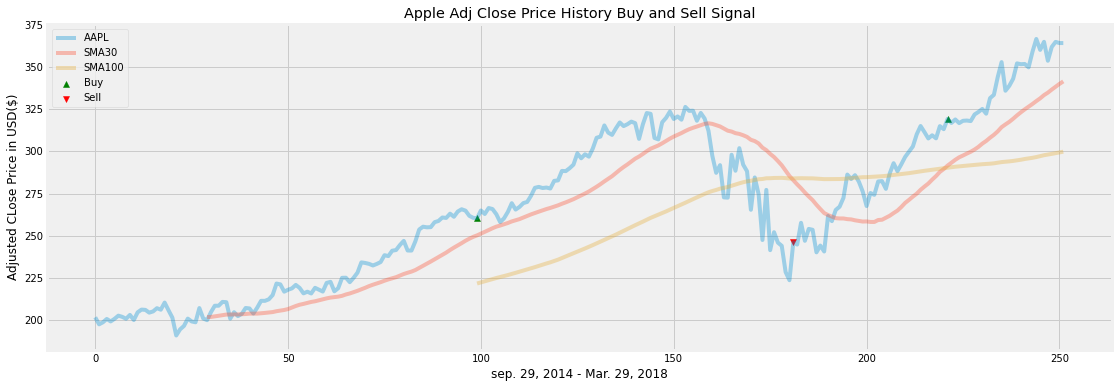

In [15]:
#Visualize the buy and sell signal

plt.figure(figsize=(17,6))
plt.plot(data['AAPL'], label = 'AAPL', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA100'], label = 'SMA100', alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], color = 'green', label='Buy', marker='^')
plt.scatter(data.index, data['Sell_Signal_Price'], color = 'red', label='Sell', marker='v')
#plt.plot(df['Close'], label='Close Price', alpha=0.35)
plt.title('Apple Adj Close Price History Buy and Sell Signal')
plt.xlabel('sep. 29, 2014 - Mar. 29, 2018')
plt.ylabel("Adjusted CLose Price in USD($)")
plt.legend(loc='upper left')
plt.show()